In [51]:
%python --version

UsageError: Line magic function `%python` not found (But cell magic `%%python` exists, did you mean that instead?).


In [29]:
"""
Benchmark de algoritmos de ordenamiento
Autor: Dr. Matías Blaña
(Clase simulada – Postulación UTFSM, 2025)

Compara tiempos de ejecución y escalamiento de algoritmos de sorting.
Incluye un ajuste de ley de potencias para proyectar tiempos a grandes N.
"""

import random
import timeit
import matplotlib.pyplot as plt
import numpy as np

# ---------------------------------------------------
# Reproducibilidad
# ---------------------------------------------------
SEED = 42
random.seed(SEED)
np.random.seed(SEED)

# ---------------------------------------------------
# Implementaciones básicas
# ---------------------------------------------------

def bubble_sort(arr):
    a = arr.copy()
    n = len(a)
    for i in range(n):
        for j in range(0, n - i - 1):
            if a[j] > a[j + 1]:
                a[j], a[j + 1] = a[j + 1], a[j]
    return a

def insertion_sort(arr):
    a = arr.copy()
    for i in range(1, len(a)):
        key = a[i]
        j = i - 1
        while j >= 0 and key < a[j]:
            a[j + 1] = a[j]
            j -= 1
        a[j + 1] = key
    return a

def merge(left, right):
    result = []
    i = j = 0
    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    result.extend(left[i:])
    result.extend(right[j:])
    return result

def merge_sort(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])
    return merge(left, right)

def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr)//2]
    left  = [x for x in arr if x < pivot]
    mid   = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + mid + quick_sort(right)

# ---------------------------------------------------
# Función para medir tiempos
# ---------------------------------------------------
def measure_time(func, arr):
    start = timeit.default_timer()
    func(arr)
    return timeit.default_timer() - start

# ---------------------------------------------------
# Benchmark principal
# ---------------------------------------------------
sizes = [10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000]
# sizes = [10, 30, 100, 300, 1000, 3000, 10000]
algorithms = {
    "Bubble": bubble_sort,
    "Insertion": insertion_sort,
    "Merge": merge_sort,
    "Quick": quick_sort,
    "Python (Timsort)": sorted,
}

results = {name: [] for name in algorithms}

print("⏱ Ejecutando benchmark con semilla =", SEED)

for n in sizes:
    arr = [random.random() for _ in range(n)]
    print(f"\nArray size = {n}")
    for name, func in algorithms.items():
        try:
            t = measure_time(func, arr)
            results[name].append(t)
            print(f"  {name:>15s}: {t:8.4f} s")
        except RecursionError:
            results[name].append(np.nan)
            print(f"  {name:>15s}: recursion limit ❌")



⏱ Ejecutando benchmark con semilla = 42

Array size = 10
           Bubble:   0.0000 s
        Insertion:   0.0000 s
            Merge:   0.0000 s
            Quick:   0.0000 s
  Python (Timsort):   0.0000 s

Array size = 30
           Bubble:   0.0000 s
        Insertion:   0.0000 s
            Merge:   0.0000 s
            Quick:   0.0000 s
  Python (Timsort):   0.0000 s

Array size = 100
           Bubble:   0.0003 s
        Insertion:   0.0002 s
            Merge:   0.0001 s
            Quick:   0.0001 s
  Python (Timsort):   0.0000 s

Array size = 300
           Bubble:   0.0029 s
        Insertion:   0.0018 s
            Merge:   0.0004 s
            Quick:   0.0004 s
  Python (Timsort):   0.0000 s

Array size = 1000
           Bubble:   0.0428 s
        Insertion:   0.0196 s
            Merge:   0.0014 s
            Quick:   0.0011 s
  Python (Timsort):   0.0001 s

Array size = 3000
           Bubble:   0.2618 s
        Insertion:   0.1489 s
            Merge:   0.0038 s
       


Bubble: logT = 1.91 logN + -7.13
→ t ≈ 10^-7.13 * N^1.91

Insertion: logT = 1.91 logN + -7.41
→ t ≈ 10^-7.41 * N^1.91

Merge: logT = 1.00 logN + -5.82
→ t ≈ 10^-5.82 * N^1.00

Quick: logT = 1.02 logN + -5.94
→ t ≈ 10^-5.94 * N^1.02

Python (Timsort): logT = 0.97 logN + -6.90
→ t ≈ 10^-6.90 * N^0.97


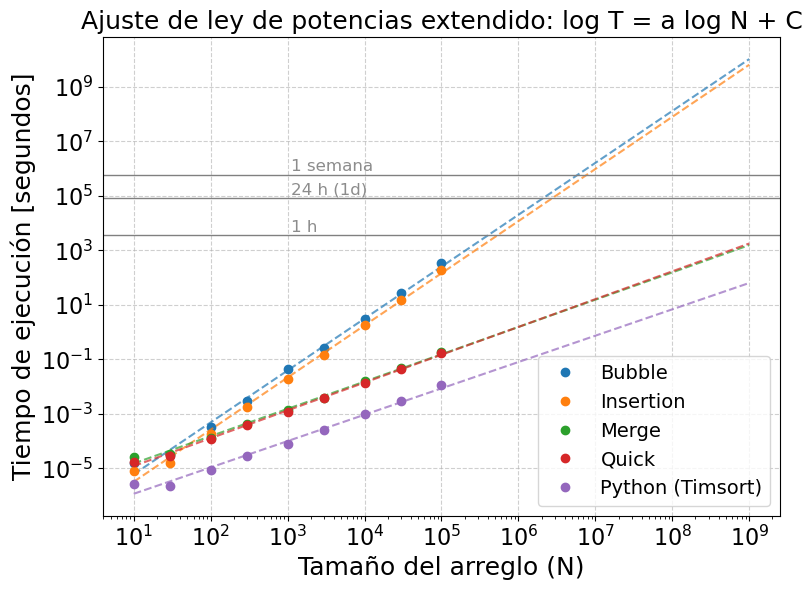

In [52]:
# ---------------------------------------------------
# Gráfico combinado: datos + ajuste power-law extendido
# ---------------------------------------------------
fit_algorithms = [ "Bubble","Insertion", "Merge", "Quick", "Python (Timsort)"]


plt.figure(figsize=(8,6))

for i, name in enumerate(fit_algorithms):
    color = f"C{i}"
    N = np.array(sizes)
    T = np.array(results[name])
    mask = ~np.isnan(T)
    N, T = N[mask], T[mask]

    # Ajuste log-log: log10(T) = a*log10(N) + C
    logN, logT = np.log10(N), np.log10(T)
    a, C = np.polyfit(logN, logT, 1)

    # Curva ajustada extendida hasta 1e8
    N_fit = np.logspace(np.log10(min(N)), 9, 200)
    T_fit = 10**(a*np.log10(N_fit) + C)

    # Plot de puntos y línea de ajuste
    plt.plot(N, T, 'o', color=color, label=name)
    plt.plot(N_fit, T_fit, '--', color=color, alpha=0.7)

    # Reporte en consola
    print(f"\n{name}: logT = {a:.2f} logN + {C:.2f}")
    print(f"→ t ≈ 10^{C:.2f} * N^{a:.2f}")

# ---------------------------------------------------
# Líneas horizontales de referencia (tiempo)
# ---------------------------------------------------
thresholds = {
    "1 h"       : 3600,
    # "12 h"      : 12*3600,
    "24 h (1d)" : 24*3600,
    "1 semana"  : 7*24*3600
}

for label, t_val in thresholds.items():
    plt.axhline(y=t_val, color='gray', ls='-', lw=1)
    plt.text(1.1e3, t_val*1.05, label, fontsize=12, color='gray',
             va='bottom', ha='left', alpha=0.9)

# ---------------------------------------------------
# Formato general del plot
# ---------------------------------------------------
sf = 18
plt.tick_params(labelsize=sf-2)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Tamaño del arreglo (N)",size=sf)
plt.ylabel("Tiempo de ejecución [segundos]",size=sf)
plt.title("Ajuste de ley de potencias extendido: log T = a log N + C",size=sf)
plt.grid(True, ls="--", alpha=0.6)
plt.legend(fontsize=14, loc="lower right")
plt.tight_layout()
plt.savefig("speed_sorting_v2.png", dpi=300, bbox_inches='tight')
plt.show()
